![Sleep Health and Lifestyle Banner](banner_image.png)

# Sleep Health and Lifestyle

This synthetic dataset contains sleep and cardiovascular metrics as well as lifestyle factors of close to 400 fictive persons.

The workspace is set up with one CSV file, `data.csv`, with the following columns:

- `Person ID`
- `Gender`
- `Age`
- `Occupation`
- `Sleep Duration`: Average number of hours of sleep per day
- `Quality of Sleep`: A subjective rating on a 1-10 scale
- `Physical Activity Level`: Average number of minutes the person engages in physical activity daily
- `Stress Level`: A subjective rating on a 1-10 scale
- `BMI Category`
- `Blood Pressure`: Indicated as systolic pressure over diastolic pressure
- `Heart Rate`: In beats per minute
- `Daily Steps`
- `Sleep Disorder`: One of `None`, `Insomnia` or `Sleep Apnea`

Check out the guiding questions or the scenario described below to get started with this dataset!
Feel free to make this workspace yours by adding and removing cells, or editing any of the existing cells.

Source: [Kaggle](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/)

### 🔍 **Scenario: Automatically identify potential sleep disorders**

This scenario helps you develop an end-to-end project for your portfolio.

Background: You work for a health insurance company and are tasked to identify whether or not a potential client is likely to have a sleep disorder. The company wants to use this information to determine the premium they want the client to pay.

**Objective**: Construct a classifier to predict the presence of a sleep disorder based on the other columns in the dataset.

Check out our [Linear Classifiers course](https://app.datacamp.com/learn/courses/linear-classifiers-in-python) (Python) or [Supervised Learning course](https://app.datacamp.com/learn/courses/supervised-learning-in-r-classification) (R) for a quick introduction to building classifiers.


You can query the pre-loaded CSV files using SQL directly. Here’s a **sample query**:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager, FontProperties
import seaborn as sns
import scipy.stats as stats
import pingouin as pg
import missingno as msno

In [2]:
sns.set_theme(style='darkgrid')
path = "../../Oxygen_only/Oxygen-Light.ttf"
fontManager.addfont(path)

prop = FontProperties(fname=path)
sns.set(font=prop.get_name())
sns.set_palette('bright')

In [4]:
sleep_data = pd.read_csv('data.csv')
sleep_data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## Explorative Data Analysis

### Initial Data Exploration

In this section we will carry out a light exploration of the structure, different columns, data types, and missing values of the dataset.

In [5]:
sleep_data.shape

(374, 13)

In [6]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [7]:
sleep_data.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [8]:
sleep_data.duplicated().sum()

0

In [9]:
#Dropping the Person ID since that's not needed for the analysis
sleep_data.drop('Person ID', axis=1, inplace=True)

In [10]:
#Rename BMI Category into BMI
sleep_data.rename(columns={'BMI Category':'BMI'}, inplace=True)
#rename all columns wit spaces to have underscores
sleep_data.columns = sleep_data.columns.str.replace(' ', '_')
sleep_data.columns = sleep_data.columns.str.lower()
print(sleep_data.columns)

Index(['gender', 'age', 'occupation', 'sleep_duration', 'quality_of_sleep',
       'physical_activity_level', 'stress_level', 'bmi', 'blood_pressure',
       'heart_rate', 'daily_steps', 'sleep_disorder'],
      dtype='object')


In [11]:
#turn gender, bmi and sleep_disorder into categorical variables
sleep_data[['occupation', 'gender', 'sleep_disorder']] = sleep_data[['occupation','gender', 'sleep_disorder']].astype('category')

In [12]:
print(sleep_data['bmi'].unique())

['Overweight' 'Normal' 'Obese' 'Normal Weight']


Both 'Normal' and 'Normal Weight', can be cleaned into 'Normal'

In [13]:
sleep_data.loc[sleep_data['bmi'] == 'Normal Weight', 'bmi'] = 'Normal'

In [14]:
cats = ['Normal', 'Overweight', 'Obese']
#create ordered categorical variable
sleep_data['bmi'] = pd.Categorical(sleep_data['bmi'], categories=cats, ordered=True)

In [15]:
sleep_data[['systolic', 'diastolic']] = sleep_data['blood_pressure'].str.split('/', expand=True)
#convert to int
sleep_data['systolic'] = sleep_data['systolic'].astype(int)
sleep_data['diastolic'] = sleep_data['diastolic'].astype(int)

In [16]:
sleep_data.describe().round(2)

,age,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,heart_rate,daily_steps,systolic,diastolic
count,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00
mean,42.18,7.13,7.31,59.17,5.39,70.17,6816.84,128.55,84.65
std,8.67,0.80,1.20,20.83,1.77,4.14,1617.92,7.75,6.16
min,27.00,5.80,4.00,30.00,3.00,65.00,3000.00,115.00,75.00
25%,35.25,6.40,6.00,45.00,4.00,68.00,5600.00,125.00,80.00
50%,43.00,7.20,7.00,60.00,5.00,70.00,7000.00,130.00,85.00
75%,50.00,7.80,8.00,75.00,7.00,72.00,8000.00,135.00,90.00
max,59.00,8.50,9.00,90.00,8.00,86.00,10000.00,142.00,95.00


In [17]:
#describe the categorical variables
sleep_data.describe(include=['category'])

,gender,occupation,bmi,sleep_disorder
count,374,374,374,374
unique,2,11,3,3
top,Male,Nurse,Normal,None
freq,189,73,216,219


#### Initial Insights

- No missing values!
- No duplicates!
- A mix of 'object', 'int64', and 'float64' data types
- 'Blood Pressure' values are a string consisting of both systolic and diastolic pressure - (can be separated)
- 4 categorical variables : gender (binary), occupation (nominal), BMI category (ordinal), sleep disorder (nominal)
- There's a disproportionate amount of people with 'None' sleep disorder compared to 'Insomnia' and 'Sleep Apnea' (suggests an imbalanced problem)

### In-Depth Data Analysis

In this section we will carry out a more in-depth analysis of the dataset based on initial findings. The analysis will be carried out via efficient grouping and aggregation of the data, as well as visualizations.

Some of the questions raised during the initial data exploration:
- How does age relate to sleep duration?
    - How does sleep quality factor into sleep duration? Does sleeping longer mean better quality?
    - How do sleep disorders factor into sleep duration?
- Relation of sleep duration to physical activity level?
    - How does sleep quality factor into physical activity level?
    - How does the BMI category factor into this?
    - How does the walking level factor into this?
    - Do people who walk more have better sleep quality?
    - What are the bmi proportions among people with sleep disorders?
- What are the occupation proportions among people with sleep disorders?
- Do sleep disorders impact the level of stress? Or vice versa?
    - Do people who exercise more have lower stress levels?
- How does sleep duration relate to heart rate?
    - How does blood pressure relate to this?
    - How does sleep quality factor into this?
    - How does sleep disorder factor into this?
- What is the average sleep duration for each occupation?
    - How does sleep quality factor into this?
- Does gender impact sleep duration?
    - How does sleep quality factor into this?
    
    
In order to answer these questions, new columns will be created to facilitate the analysis. One such column will the 'walking_level' which will be defined as follows:
- 0: 0-5000 steps : Sedentary
- 1: 5000-7499 steps : Low Active
- 2: 7500-9999 steps : Active

In [18]:
#categorize the daily steps
sleep_data['walking_level'] = pd.cut(sleep_data['daily_steps'], bins=[0, 5000, 7500, 10000], labels=['Sedenatry', 'Low Active', 'Active'])

In [19]:
#create a new column for blood pressure level based on both the systolic and diastolic
sleep_data['bp_level'] = sleep_data.loc[(sleep_data['systolic'] < 120) & (sleep_data['diastolic'] < 80), 'bp_level'] = 'Normal'
sleep_data.loc[(sleep_data['systolic'] >= 120) & (sleep_data['systolic'] < 130) & (sleep_data['diastolic'] < 80), 'bp_level'] = 'Elevated'
sleep_data.loc[(sleep_data['systolic'] >= 130) & (sleep_data['systolic'] < 140) | (sleep_data['diastolic'] >= 80) & (sleep_data['diastolic'] < 90), 'bp_level'] = 'Stage 1 High'
sleep_data.loc[(sleep_data['systolic'] >= 140) | (sleep_data['diastolic'] >= 90), 'bp_level'] = 'Stage 2 High'

#turn the bp_level into a categorical variable with an order
cats = ['Normal', 'Elevated', 'Stage 1 High', 'Stage 2 High']
sleep_data['bp_level'] = pd.Categorical(sleep_data['bp_level'], categories=cats, ordered=True)

In [20]:
sleep_data_processed = sleep_data.copy()

#### Start of Analysis

##### How does age relate to sleep duration?

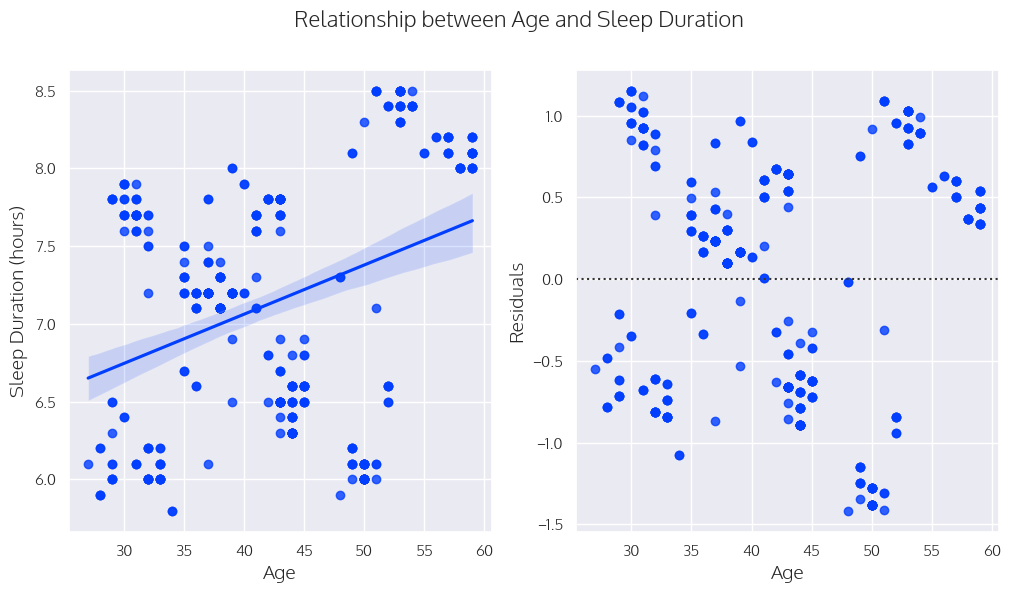

In [21]:
#make subplots 1 row, 2 cols
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

sns.regplot(
    x='age',
    y='sleep_duration',
    data=sleep_data_processed,
    ax=ax1,
)

#make a residual plot
sns.residplot(
    x='age',
    y='sleep_duration',
    data=sleep_data_processed,
    ax=ax2,
)

fig.suptitle('Relationship between Age and Sleep Duration', fontsize=16)

#set better axis labels
ax1.set_xlabel('Age', fontsize=14)
ax1.set_ylabel('Sleep Duration (hours)', fontsize=14)
ax2.set_xlabel('Age', fontsize=14)
ax2.set_ylabel('Residuals', fontsize=14)

plt.show()

Two immediate insights can be drawn from the regression plot
- There seems to be a positive correlation between age and sleep duration.
    - On the other hand, the residual plot doesn't clearly show a random scattering, which suggests the the relationship is not purely linear.
- There seem to be 3 distinct clusters between age and sleep duration, this could imply that these two columns can be transformed using PCA (maybe).

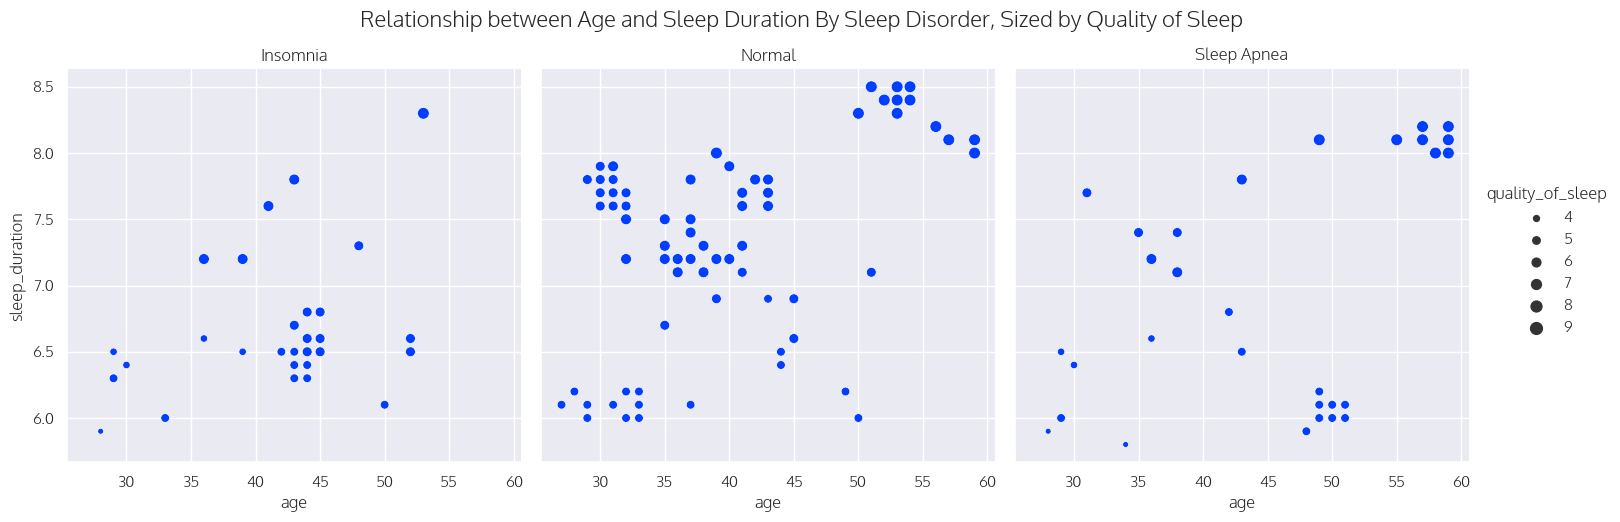

In [22]:

g = sns.relplot(
    x='age',
    y='sleep_duration',
    data=sleep_data_processed,
    kind='scatter',
    size='quality_of_sleep',
    col='sleep_disorder',
)

#set better subplot titles
g.axes[0, 0].set_title('Insomnia')
g.axes[0, 1].set_title('Normal')
g.axes[0, 2].set_title('Sleep Apnea')
#set nice global title
g.fig.suptitle('Relationship between Age and Sleep Duration By Sleep Disorder, Sized by Quality of Sleep', fontsize=16, y=1.04)
plt.show()

Text(0, 0.5, 'Mean Sleep Duration (hours)')

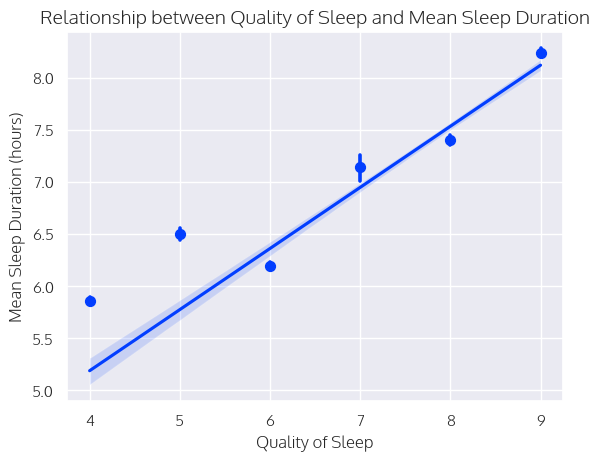

In [23]:
sns.regplot(
    x='quality_of_sleep',
    y='sleep_duration',
    x_estimator=np.mean,
    data=sleep_data_processed,
)
#add nice title and axis labels
plt.title('Relationship between Quality of Sleep and Mean Sleep Duration', fontsize=14)
plt.xlabel('Quality of Sleep', fontsize=12)
plt.ylabel('Mean Sleep Duration (hours)', fontsize=12)

- By breaking down the scatter plot by sleep disorder, the disproportionality of count for no sleeping disorder is more visually apparent.
- Moreover, there doesn't seem to be a clear discerning pattern between sleep duration and age for the different sleep disorders.
- Plotting the sleep quality as the size of points shows that the sleep quality is generally higher for people with longer sleep duration.
    - This is backed by the fact there is a strong correlation between average sleep duration and sleep quality.
    - Another interesting observation, is that the (synthetically) reported sleep quality is generally higher for people with no sleep disorder, compared to people with sleep disorders.
    - Let's try to summarize this information in a table.

In [24]:
age_duration_quality_summary = sleep_data_processed.groupby(['sleep_disorder'])[['sleep_duration', 'quality_of_sleep']].agg(['mean', 'std', 'min', 'max']).round(2)
#rename all columns appropriately
age_duration_quality_summary = age_duration_quality_summary.rename(columns={'mean':'Mean', 'std':'STD', 'min':'Minimum', 'max':'Maximum'})
age_duration_quality_summary

sleep_duration                       quality_of_sleep        \
                         Mean   STD Minimum Maximum             Mean   STD   
sleep_disorder                                                               
Insomnia                 6.59  0.39     5.9     8.3             6.53  0.80   
None                     7.36  0.73     6.0     8.5             7.63  0.98   
Sleep Apnea              7.03  0.97     5.8     8.2             7.21  1.65   

                                
               Minimum Maximum  
sleep_disorder                  
Insomnia             4       9  
None                 6       9  
Sleep Apnea          4       9

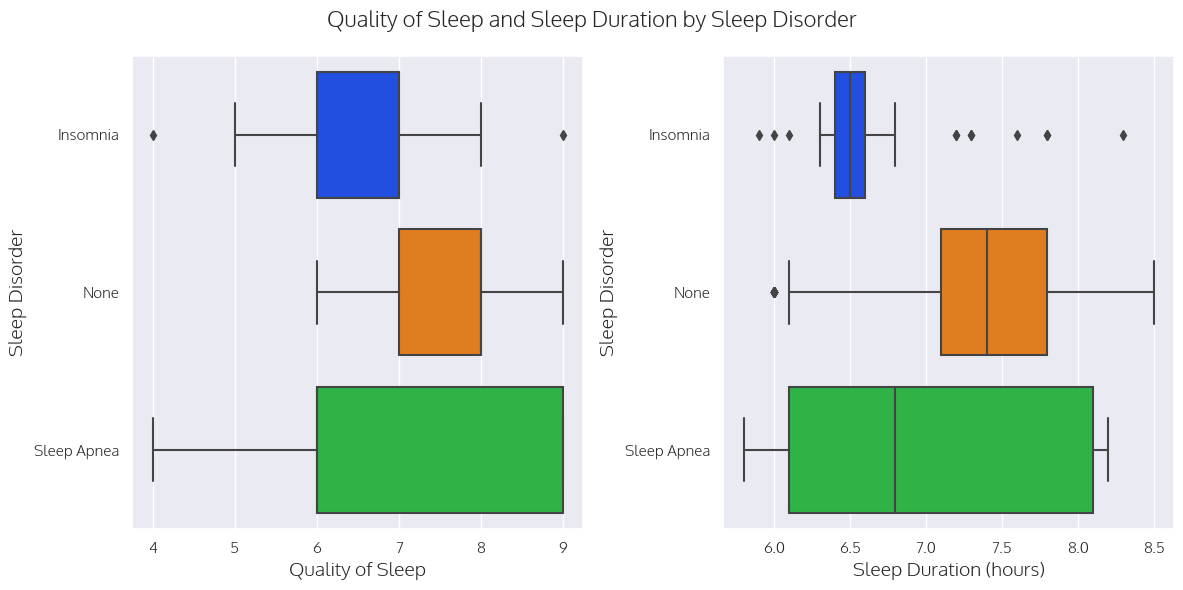

In [25]:
#box plot of quality of sleep by sleep disorder side by side with sleep duration
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

sns.boxplot(
    y='sleep_disorder',
    x='quality_of_sleep',
    data=sleep_data_processed,
    ax=ax1,
)

sns.boxplot(
    y='sleep_disorder',
    x='sleep_duration',
    data=sleep_data_processed,
    ax=ax2,
)

#set better axis labels
ax1.set_ylabel('Sleep Disorder', fontsize=14)
ax1.set_xlabel('Quality of Sleep', fontsize=14)
ax2.set_ylabel('Sleep Disorder', fontsize=14)
ax2.set_xlabel('Sleep Duration (hours)', fontsize=14)

fig.suptitle('Quality of Sleep and Sleep Duration by Sleep Disorder', fontsize=16)
plt.tight_layout()
plt.show()

- The sumamarized table does show that people with no sleep disorder tend to report higher averages of both sleep duration and quality of sleep.
- However, the reported maximum quality of sleep amongst all three groups is the same with a score of 9, this could suggest outliers for the groups with sleep disorders.
- Another interesting fact made clear by both this table and the previous plot, is that both sleep duration and quality of sleep are strongly correlated, <span style='color:red'>suggesting that one of these columns can be dropped.</span>
- There are quite a few outlier values for sleep duration for people with insomnia.
    - It might be better to use the quality of sleep over sleep duration due to its relative robustness to outliers.
- The IQR for both quality of sleep and sleep duration amongst individuals with 'Sleep Apnea' is much higher than the other two group.

While the averages of both sleep duration and sleep quality tend to be higher for those with no sleep disorders, let's make sure that this is statistically significant, and not just a result of the imbalance in the dataset. In the following section we will carry out an ANOVA test followed by a pairwise test to compare the means of the different groups.

<b>ANOVA</b>

Due to the imbalance in the dataset, we'll set $\alpha = 0.01$

$H_0 : \text{There is no statistically significant difference in the mean sleep duration between individuals with sleep disorders and those without sleep disorders.}$

$H_1 : \text{There is a statistically significant difference in the mean sleep duration between at least one pair of groups (i.e., those with sleep disorders vs. those without).}$

In [26]:
stats = pg.anova(
    dv='sleep_duration',
    between='sleep_disorder',
    data=sleep_data_processed,
    detailed=False
)

print(stats)

           Source  ddof1  ddof2          F         p-unc       np2
0  sleep_disorder      2    371  31.913468  1.626151e-13  0.146787


The extremely low `p-unc` value suggests that there is a statistically significant difference in the mean sleep duration between at least one pair of groups. Let's carry out a pairwise test to determine which groups are significantly different. Once again using the Bonferroni correction, we'll set $\alpha = 0.01$

In [27]:
#carry out pairwise test
pairwise = pg.pairwise_tests(
    dv='sleep_duration',
    between='sleep_disorder',
    data=sleep_data_processed,
    padjust='bonf',
    effsize='cohen'
)

#show the results
pairwise

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,cohen
0,sleep_disorder,None,Sleep Apnea,False,True,2.698354,109.503429,two-sided,8.072473e-03,2.421742e-02,bonf,4.351,0.406617
1,sleep_disorder,None,Insomnia,False,True,11.596642,249.715585,two-sided,3.677478e-25,1.103243e-24,bonf,3.572e+22,1.163828
2,sleep_disorder,Sleep Apnea,Insomnia,False,True,3.722142,100.961256,two-sided,3.252264e-04,9.756792e-04,bonf,85.061,0.595134


- Interestingly enough, it seems there's no significant difference between the mean sleep duration of people with no sleep disorder, and those with sleep apnea.
- However, there is a significant difference between the mean sleep duration of people with no sleep disorder, and those with insomnia, and between those with insomnia and those with sleep apnea.

These conclusions were drawn based on the value of `p-corr` and the significance level $\alpha$.

Let's carry out a similar analysis for sleep quality.

In [28]:
#do same for quality of sleep
stats = pg.anova(
    dv='quality_of_sleep',
    between='sleep_disorder',
    data=sleep_data_processed,
    detailed=False
)

print(stats)

#carry out pairwise test
pairwise = pg.pairwise_tests(
    dv='quality_of_sleep',
    between='sleep_disorder',
    data=sleep_data_processed,
    padjust='bonf',
    effsize='cohen'
)

#show the results
pairwise

           Source  ddof1  ddof2          F         p-unc       np2
0  sleep_disorder      2    371  27.600604  6.688642e-12  0.129519


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,cohen
0,sleep_disorder,None,Sleep Apnea,False,True,2.126444,96.909169,two-sided,3.600675e-02,1.080203e-01,bonf,1.204,0.354049
1,sleep_disorder,None,Insomnia,False,True,9.682934,159.954940,two-sided,9.721133e-18,2.916340e-17,bonf,1.913e+16,1.170362
2,sleep_disorder,Sleep Apnea,Insomnia,False,True,3.238079,112.095592,two-sided,1.583286e-03,4.749859e-03,bonf,19.539,0.518116


- The same conclusions can be drawn for sleep quality.

The analysis of age, sleep duration, and sleep quality has led to some interesting insights.
- Firstly there doesn't seem to be any relation of the age of a person to their sleep disorder.
- Both sleep duration and sleep quality are higher for people with no sleep disorder, in a similar way.
- Sleep duration and sleep quality are strongly correlated, suggesting that one of these columns can be dropped.
- Statistical tests show that this difference isn't observed between people with no sleep disorder, and those with sleep apnea.

#### Analysis on Physical Activity Levels

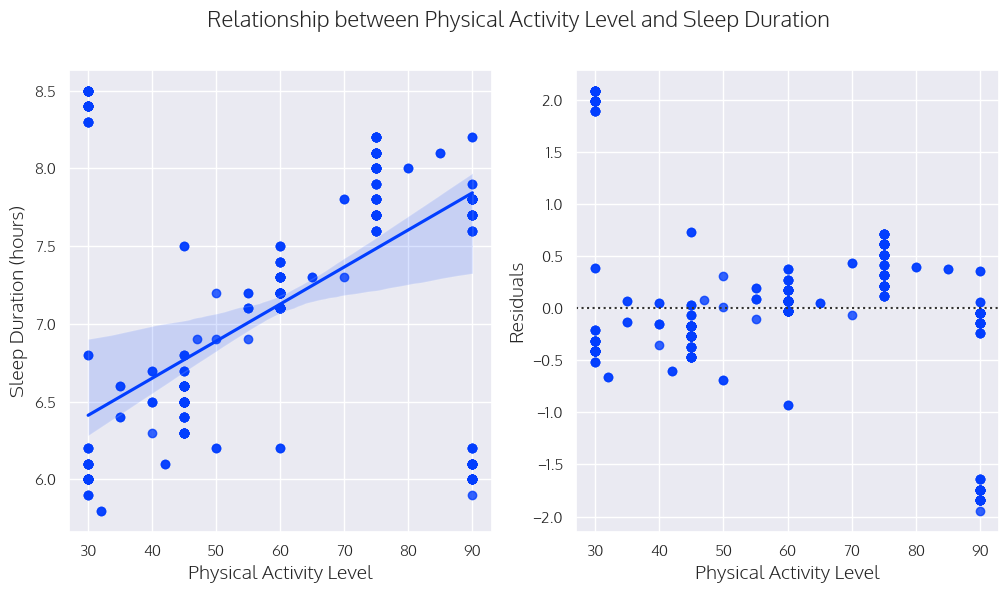

In [29]:
#regression plot of physical activity level and sleep duration with resid plot beside it
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

sns.regplot(
    x='physical_activity_level',
    y='sleep_duration',
    data=sleep_data_processed,
    ax=ax1,
    robust=True,
)

sns.residplot(
    x='physical_activity_level',
    y='sleep_duration',
    data=sleep_data_processed,
    ax=ax2,
    robust=True,
)

#set better axis labels
ax1.set_xlabel('Physical Activity Level', fontsize=14)
ax1.set_ylabel('Sleep Duration (hours)', fontsize=14)
ax2.set_xlabel('Physical Activity Level', fontsize=14)
ax2.set_ylabel('Residuals', fontsize=14)

fig.suptitle('Relationship between Physical Activity Level and Sleep Duration', fontsize=16)
plt.show()

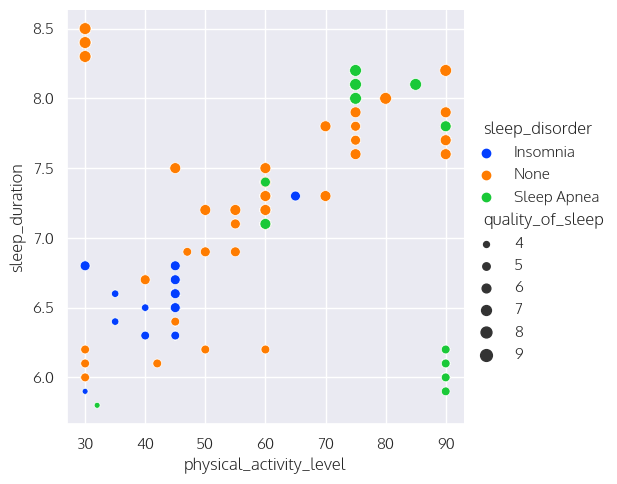

In [30]:
sns.relplot(
    x='physical_activity_level',
    y='sleep_duration',
    data=sleep_data_processed,
    kind='scatter',
    size='quality_of_sleep',
    hue='sleep_disorder'
)

- The regression plot shows, that there is correlation between physical activity level and sleep duration, (ignoring for outliers).
    - As quality of sleep is also correlated with sleep duration, this will suggest higher activity levels which lead to longer sleep duration, also result in better quality of sleep.
    - Only one of these columns should be used in the model to avoid multicollinearity.

/Users/akhtar/opt/anaconda3/envs/new_tf/lib/python3.10/site-packages/seaborn/categorical.py:3024: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


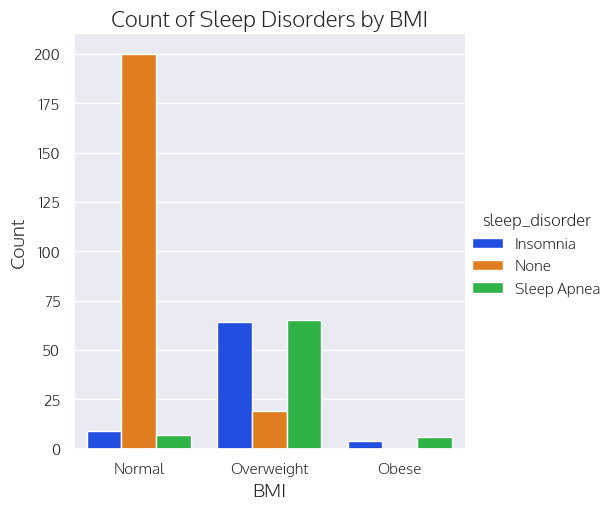

In [31]:
sns.catplot(
    x='bmi',
    data=sleep_data_processed,
    kind='count',
    hue='sleep_disorder',
    ax=ax1,
)

#set better axis labels
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.title('Count of Sleep Disorders by BMI', fontsize=16)

plt.show()

The bar plot above provides some interesting insights:
- Firstly, there are very few people that are obese, indicating that these are outliers
- Majority of the people without sleep disorders also fall into the normal weight category.
- Whereas, there are greater counts of people with sleep disorders in the overweight category.
    - The counts of people with both Insomnia and Sleep Apnea are similar in the overweight category.

To affirm these observations, let's carry out a chi-square test of independence.

<b>CHI2 TEST</b>

$H_0 : \text{There is no statistically significant association between BMI category and sleep disorder.}$

$H_1 : \text{There is a statistically significant association between BMI category and sleep disorder.}$

Once again, we set the value of $\alpha = 0.01$ due to the imbalance in the dataset.

In [32]:
#switch of warnings
import warnings
warnings.filterwarnings('ignore')

#chi2 test between bmi and sleep disorder
_, _, stats = pg.chi2_independence(
    x='bmi',
    y='sleep_disorder',
    data=sleep_data_processed
)

stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,245.665344,4.0,5.588351e-52,0.573088,1.0
1,cressie-read,0.666667,251.298536,4.0,3.418369e-53,0.579621,1.0
2,log-likelihood,0.000000,280.597760,4.0,1.656186e-59,0.612479,1.0
3,freeman-tukey,-0.500000,NaN,4.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,4.0,0.000000e+00,inf,1.0
5,neyman,-2.000000,NaN,4.0,NaN,NaN,NaN


- The CHI2 test shows that there is a statistically significant association between BMI category and sleep disorder as the `pval` is extremely low.

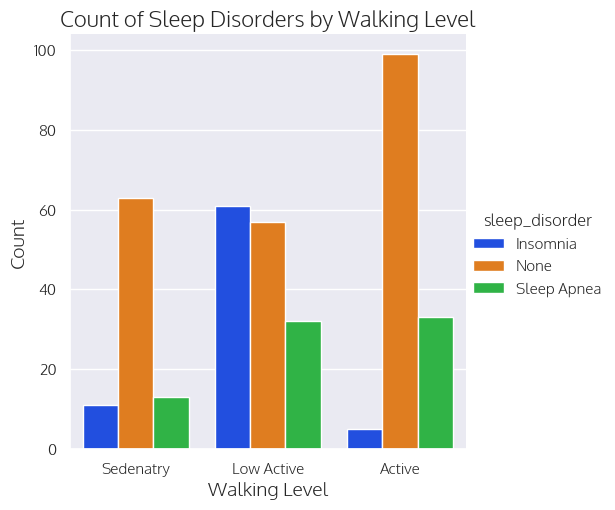

In [33]:
#catplot between walking level and sleep disorder
sns.catplot(
    x='walking_level',
    data=sleep_data_processed,
    kind='count',
    hue='sleep_disorder',
)

#set better axis labels
plt.xlabel('Walking Level', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.title('Count of Sleep Disorders by Walking Level', fontsize=16)

plt.show()

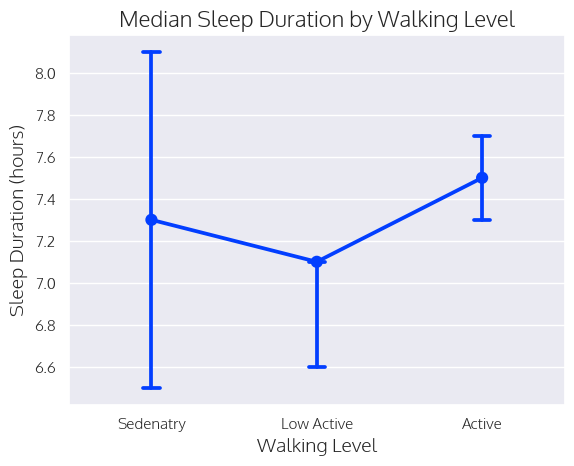

In [34]:
#point plot between walking level and sleep duration using the median
sns.pointplot(
    x='walking_level',
    y='sleep_duration',
    data=sleep_data_processed,
    estimator=np.median,
    capsize=.1,
)

#set better axis labels
plt.xlabel('Walking Level', fontsize=14)
plt.ylabel('Sleep Duration (hours)', fontsize=14)

plt.title('Median Sleep Duration by Walking Level', fontsize=16)

plt.show()

- The plots above show that there doesn't seem to be much of an association between the walking level and the sleep disorders, or with the duration of walking.
- Furthermoe, the confidence interval for the average sleep duration for the 'Sedentary' walking level is quite large.

#### Relationship between Occupations, Sleep Disorders, and Sleep duration

In this section we'll explore how the proportions of occupations relate to those of sleep disorders, additionally comparing sleep duration. We'll limit our exploration to only comparing sleep duration, as it's a clear indicator of sleep quality.

In [49]:
# group by occupation, get mean, std, min, max sleep durations, and count
# rename appropriately
# round to 2 decimal places
# sort by mean sleep duration
# intuitive variable name
occupation_summary = sleep_data_processed.groupby(['occupation'])['sleep_duration'].agg(
    ['mean', 'std', 'min', 'max', 'count']).round(2).sort_values(by=['mean', 'count'], ascending=False)
occupation_summary = occupation_summary.rename(
    columns={'mean': 'Mean', 'std': 'STD', 'min': 'Minimum', 'max': 'Maximum', 'count': 'Count'})
occupation_summary

,Mean,STD,Minimum,Maximum,Count
occupation,,,,,
Engineer,7.99,0.51,6.5,8.5,63
Lawyer,7.41,0.27,6.9,7.9,47
Accountant,7.11,0.31,6.5,8.0,37
Nurse,7.06,0.99,5.9,8.2,73
Doctor,6.97,0.86,6.0,8.2,71
Manager,6.90,NaN,6.9,6.9,1
Software Engineer,6.75,0.87,5.9,7.5,4
Teacher,6.69,0.23,6.3,7.2,40
Salesperson,6.40,0.09,6.3,6.5,32


- The table shows a clear difference between statistical measures of sleep duration between occupations.
 - Engineer's have the highest average sleep duration
 - While Sales Rep's have the lowest average sleep duration, with a shocking 5.9 hours of sleep on average.
    - However, only 2 Sales Rep's were sampled, so this might not be a good representation of the population.
    - There are quite a few occupations who have less than 5 samples
        - 1 Manager <span style='color: red'>should be removed</span>
        - 4 Scientists <span style='color: red'>should be removed</span>
        - 4 Software Engineers <span style='color: red'>can be joined with Engineers</span>
        - 2 Sales Reps <span style='color: red'>can be joined with Salesperson</span>
 - Out of all occupations, the standard deviations of sleep duration are the highest for nurses.

In [70]:
#drop rows with 'Scientist' and 'Manager'
scientist_manager = (sleep_data_processed['occupation'] == 'Scientist') | (sleep_data_processed['occupation'] == 'Manager')
sleep_data_filtered_for_occupation = sleep_data_processed.drop(sleep_data_processed[scientist_manager].index)
#turn 'Sales Representative' into 'Salesperson'
#turn 'Software Engineer' into 'Engineer'
sleep_data_filtered_for_occupation.loc[sleep_data_filtered_for_occupation['occupation'] == 'Sales Representative', 'occupation'] = 'Salesperson'
sleep_data_filtered_for_occupation.loc[sleep_data_filtered_for_occupation['occupation'] == 'Software Engineer', 'occupation'] = 'Engineer'
#rmeove unused categories
sleep_data_filtered_for_occupation['occupation'] = sleep_data_filtered_for_occupation['occupation'].cat.remove_unused_categories()


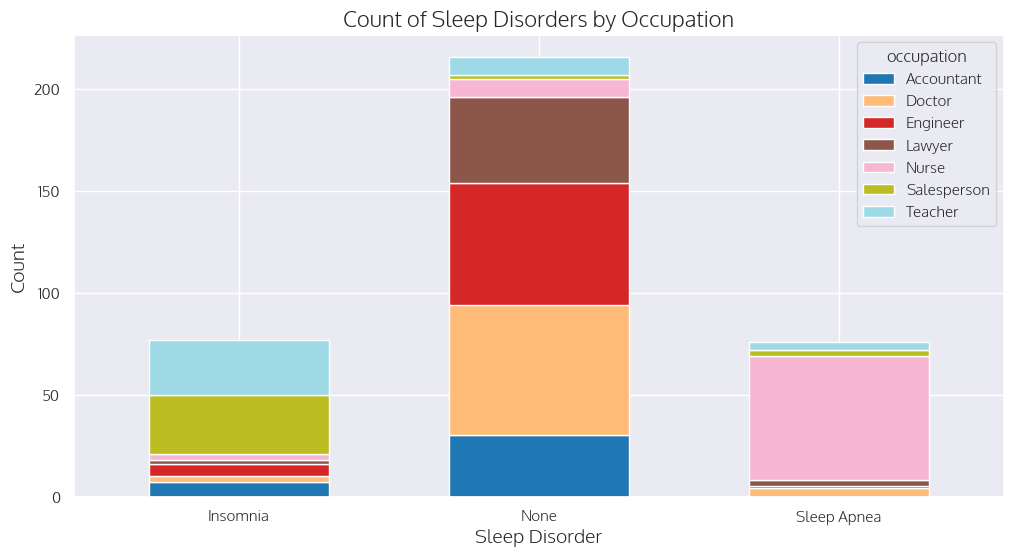

In [71]:
#group by sleep_disorder and occupation, get count
#unstack
#plot stacked bar chart with sleep disorder on the x-axis
#use matching palette
sleep_disorder_occupation = sleep_data_filtered_for_occupation.groupby(['sleep_disorder', 'occupation']).size().unstack()
# your existing import and data manipulation code
import matplotlib.pyplot as plt

palette_choice = "tab20"  # or "tab10", "Set2", "Paired", etc.

ax = sleep_disorder_occupation.plot.bar(stacked=True, figsize=(12, 6), width=0.6, colormap=palette_choice)

#rotate x-ticks to 0
plt.xticks(rotation=0)

#set better axis labels
plt.xlabel('Sleep Disorder', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.title('Count of Sleep Disorders by Occupation', fontsize=16)

plt.show()



The bar plot above illustrates some interesting insights:
- It seem's majority of the individuals with sleep apnea are of the nurse occupation.
- Moreover, teachers, and salespersons have the highest counts of people with insomnia.
- Of the many occupations that reported higher average sleep durations, they seem to have no sleep disorders.
- All of this suggests some sort of association between occupation and sleep disorders.
    - Thought this is unlikely to be a causal relationship. Due to the fact that the dataset is synthetic, and the fact that the sample size is quite small.
    - However, for the purposes of this analysis, and modelling, we have identified the occupation feature being a good predictor of sleep disorders.
    - We will affirm this with a chi-square test of independence.

<b>CHI2 TEST</b>

$H_0 : \text{There is no statistically significant association between occupation and sleep disorder.}$

$H_1 : \text{There is a statistically significant association between occupation and sleep disorder.}$

Once again, we set the value of $\alpha = 0.01$ due to the imbalance in the dataset.

In [72]:
#carry out chi2 test between occupation and sleep disorder
_, _, stats = pg.chi2_independence(
    x='occupation',
    y='sleep_disorder',
    data=sleep_data_filtered_for_occupation
)

stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,401.783220,12.0,1.586354e-78,0.737849,1.0
1,cressie-read,0.666667,370.493977,12.0,6.601563e-72,0.708537,1.0
2,log-likelihood,0.000000,352.105000,12.0,5.044752e-68,0.690729,1.0
3,freeman-tukey,-0.500000,NaN,12.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,12.0,0.000000e+00,inf,1.0
5,neyman,-2.000000,NaN,12.0,NaN,NaN,NaN


In light of the astoundingly low p-values, we can reject the null hypothesis, and conclude that there is a statistically significant association between occupation and sleep disorder.

#### Analysis between Medical Metrics and Sleep Disorders

In this section we'll explore how medical metrics such as heart rate, and category of hypertension relate to sleep disorders.

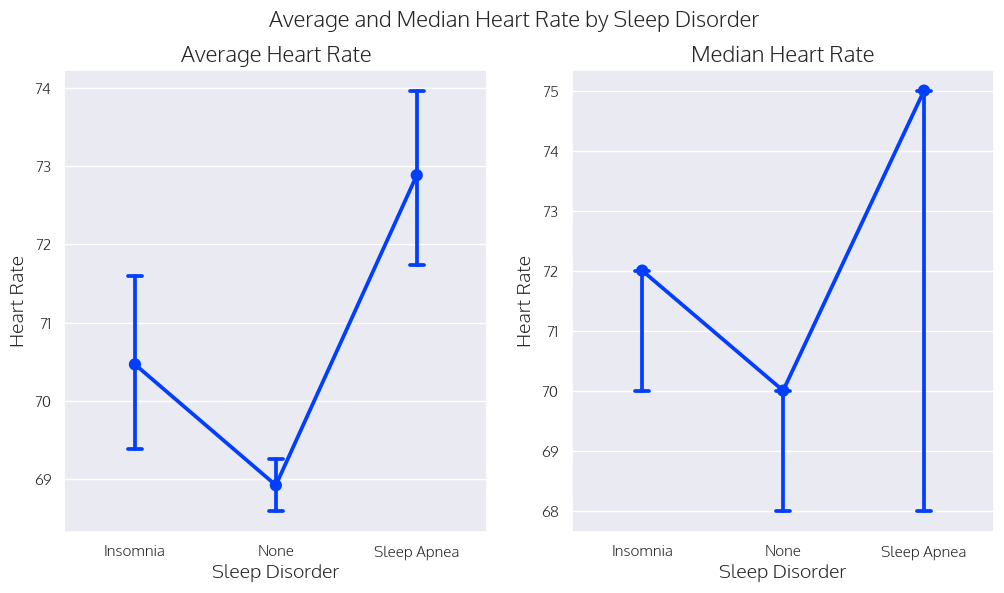

In [92]:
#using a point plot from catplot, compare sleep disorders and average heart rate
#in a side by side plot also using the median
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

sns.pointplot(
    x='sleep_disorder',
    y='heart_rate',
    data=sleep_data_filtered_for_occupation,
    estimator=np.mean,
    capsize=.1,
    ax=ax1,
)

sns.pointplot(
    x='sleep_disorder',
    y='heart_rate',
    data=sleep_data_filtered_for_occupation,
    estimator=np.median,
    capsize=.1,
    ax=ax2,
)

#set better axis labels
ax1.set_xlabel('Sleep Disorder', fontsize=14)
ax1.set_ylabel('Heart Rate', fontsize=14)
ax2.set_xlabel('Sleep Disorder', fontsize=14)
ax2.set_ylabel('Heart Rate', fontsize=14)

#subplot titles
ax1.set_title('Average Heart Rate', fontsize=16)
ax2.set_title('Median Heart Rate', fontsize=16)


fig.suptitle('Average and Median Heart Rate by Sleep Disorder', fontsize=16)
plt.show()

In [93]:
# group by sleep disorder, get mean, std, median of heart rate values
# rename appropriately
# round to 2 decimal places
# sort by mean heart rate
# intuitive variable name
heart_rate_summary = sleep_data_filtered_for_occupation.groupby(['sleep_disorder'])['heart_rate'].agg(
    ['mean', 'std', 'median']).round(2).sort_values(by=['mean'], ascending=False)
heart_rate_summary = heart_rate_summary.rename(
    columns={'mean': 'Mean', 'std': 'STD', 'median': 'Median'})
heart_rate_summary

,Mean,STD,Median
sleep_disorder,,,
Sleep Apnea,72.88,5.02,75.0
Insomnia,70.47,4.95,72.0
None,68.93,2.56,70.0


The point plot and summary table both show that patients of sleep apnea have the highest:
- mean heart rate
- heart rate standard deviation
- and median heart rate

<b>ANOVA TEST</b>

$H_0 : \text{There is no statistically significant difference in the mean heart rate between individuals with sleep disorders and those without sleep disorders.}$

$H_1 : \text{There is a statistically significant difference in the mean heart rate between at least one pair of groups (i.e., those with sleep disorders vs. those without).}$

Once again, we set the value of $\alpha = 0.01$ due to the imbalance in the dataset.

In [94]:
#carry out anova test between sleep disorder and heart rate
stats = pg.anova(
    dv='heart_rate',
    between='sleep_disorder',
    data=sleep_data_filtered_for_occupation,
    detailed=False
)

print(stats)

           Source  ddof1  ddof2          F         p-unc       np2
0  sleep_disorder      2    366  31.801765  1.843418e-13  0.148052


In light of the extremely small p-unc value we can reject the null hypothesis, and conclude that there is a statistically significant difference in the mean heart rate between at least one pair of groups.

Let's follow through with a pairwise test to determine which groups are significantly different.

<b>PAIRWISE TESTS</b>

In [96]:
#conduct pairwise test
pairwise = pg.pairwise_ttests(
    dv='heart_rate',
    between='sleep_disorder',
    data=sleep_data_filtered_for_occupation,
    padjust='bonf',
    effsize='cohen'
)

#show the results
pairwise.round(5)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,cohen
0,sleep_disorder,None,Sleep Apnea,False,True,-6.57937,89.06598,two-sided,0.00000,0.00000,bonf,3.738e+07,-1.17392
1,sleep_disorder,None,Insomnia,False,True,-2.61218,90.85437,two-sided,0.01053,0.03158,bonf,3.531,-0.46016
2,sleep_disorder,Sleep Apnea,Insomnia,False,True,2.99597,150.89067,two-sided,0.00320,0.00960,bonf,10.047,0.48447


- The pairwise tests show that there is a statistically significant difference between the mean heart rate of people with no sleep disorder, and those with sleep apnea, and between those with insomnia and those with sleep apnea.
- However, there is no significant difference between the mean heart rate of people with no sleep disorder, and those with insomnia. This is converse to the situation with average sleep duration.
    - <span style='color: green'> This suggests that the heart rate is a better predictor of sleep apnea than insomnia, while sleep duration is a better predictor of insomnia than sleep apnea.</span>


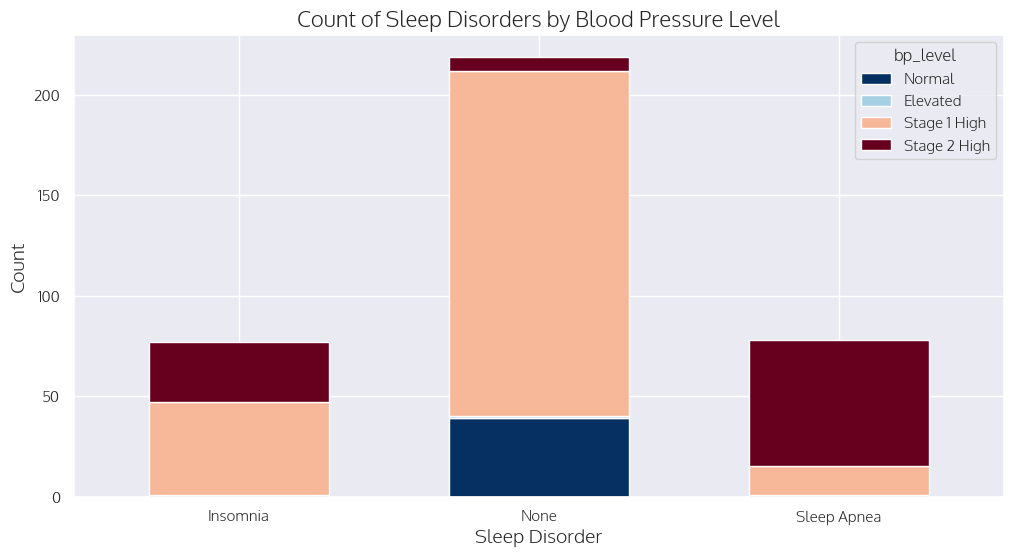

In [103]:
#group by sleep disorder and bp_level get count
#plot stacked bar chart
#use matching palette
sleep_disorder_bp_level = sleep_data_processed.groupby(['sleep_disorder', 'bp_level']).size().unstack()
# Sort the DataFrame columns
ordered_cols = ['Normal', 'Elevated', 'Stage 1 High', 'Stage 2 High']
sleep_disorder_bp_level = sleep_disorder_bp_level[ordered_cols]

# Now, your plotting code

# Palette choice which goes from blue to red
palette_choice = "RdBu_r"  # or "tab10", "Set2", "Paired", etc.

ax = sleep_disorder_bp_level.plot.bar(stacked=True, figsize=(12, 6), width=0.6, colormap=palette_choice)

# Rotate x-ticks to 0
plt.xticks(rotation=0)

# Set better axis labels
plt.xlabel('Sleep Disorder', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.title('Count of Sleep Disorders by Blood Pressure Level', fontsize=16)

plt.show()


The bar chart above provides the following insights:
- Most of the samples from this dataset have a above normal blood pressure.
- Only 2 of the samples with either of the sleep disorders have a normal blood pressure.
- Majority of samples with sleep apnea have a Stage 2 hypertension.
- While a higher proportion of samples with insomnia have a Stage 1 hypertension.
- Majority of individuals with no sleep disorder have a Stage 1 hypertension.
- There are a very small number of outliers that Elevated blood pressure.